In [132]:
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations and linear algebra
import yfinance as yf  # For fetching financial data from Yahoo Finance
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns  # For statistical data visualization
from sklearn.model_selection import train_test_split 


In [133]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
class LinearRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.theta = None

    def fit(self, X, y):
        X = np.c_[np.ones(X.shape[0]), X]
        m, n = X.shape
        self.theta = np.zeros(n)
        for _ in range(self.num_iterations):
            predictions = X.dot(self.theta)
            errors = predictions - y
            gradient = (1 / m) * X.T.dot(errors)
            self.theta -= self.learning_rate * gradient

    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]
        return X.dot(self.theta)

    def predict_single(self, feature_values):
        # Adds the intercept term
        feature_values = np.append([1], feature_values)
        return np.dot(feature_values, self.theta)

    def cost_function(self, X, y):
        m = len(y)
        predictions = self.predict(X)
        return (1 / (2 * m)) * np.sum(np.square(predictions - y))


In [130]:
class MyStocks:
    def __init__(self, tickers, start, end):
        self.tickers = tickers
        self.start = start
        self.end = end
        self.data = None
        self.before_norm = None
        self.model = None
        self.get_data()
        self.before_norm = self.data.copy()
        self.normalize_data()
        self.train_regression()
    
    def get_data(self):
        data = yf.download(self.tickers, self.start, self.end)
        adj_close_data = data['Adj Close']
        adj_close_data.to_csv('stocks.csv')
        self.data = pd.read_csv("stocks.csv", index_col="Date", parse_dates=["Date"])
    
    def normalize_data(self):
        self.data = (self.data - self.data.min()) / (self.data.max() - self.data.min()) * 2000
    
    def plot_data(self):
        if self.data is not None:
            plt.figure(figsize=(12, 6))
            for ticker in self.tickers:
                plt.plot(self.data.index, self.data[ticker], label=ticker)
            plt.title('Adjusted Close Price for Multiple Stocks')
            plt.xlabel('Date')
            plt.ylabel('Normalized Adjusted Close Price')
            plt.legend()
            plt.show()
        else:
            print("No data to plot.")

    def train_regression(self):
        # Use the first ticker as the target variable and the rest as features
        target_ticker = self.tickers[0]
        feature_tickers = self.tickers[1:]
        
        X = self.data[feature_tickers].values
        y = self.data[target_ticker].values
        
        # Split data into training and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
        
        # Standardize features
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
        # Initialize and train the model
        self.model = LinearRegression(learning_rate=0.01, num_iterations=1000)
        self.model.fit(X_train, y_train)
        
        # Make predictions and calculate cost
        y_pred = self.model.predict(X_test)
        cost = self.model.cost_function(X_test, y_test)
        
        print("Cost on test set:", cost)
        
        # Plotting predictions vs actual values
        plt.figure(figsize=(12, 6))
        plt.plot(y_test, y_pred, 'o-', color='blue', label='Predicted vs Actual')
        
        # Plot a perfect prediction line
        min_value = min(min(y_test), min(y_pred))
        max_value = max(max(y_test), max(y_pred))
        plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--', linewidth=2, label='Perfect Prediction')
        
        plt.xlabel('Actual values')
        plt.ylabel('Predicted values')
        plt.title('Actual vs Predicted values for ' + self.tickers[0])
        plt.legend()
        plt.show()

    def predict_price(self, feature_values):
        if self.model:
            return self.model.predict_single(feature_values)
        else:
            raise ValueError("Model not trained yet.")


[*********************100%%**********************]  3 of 3 completed


Cost on test set: 10882.163666636518


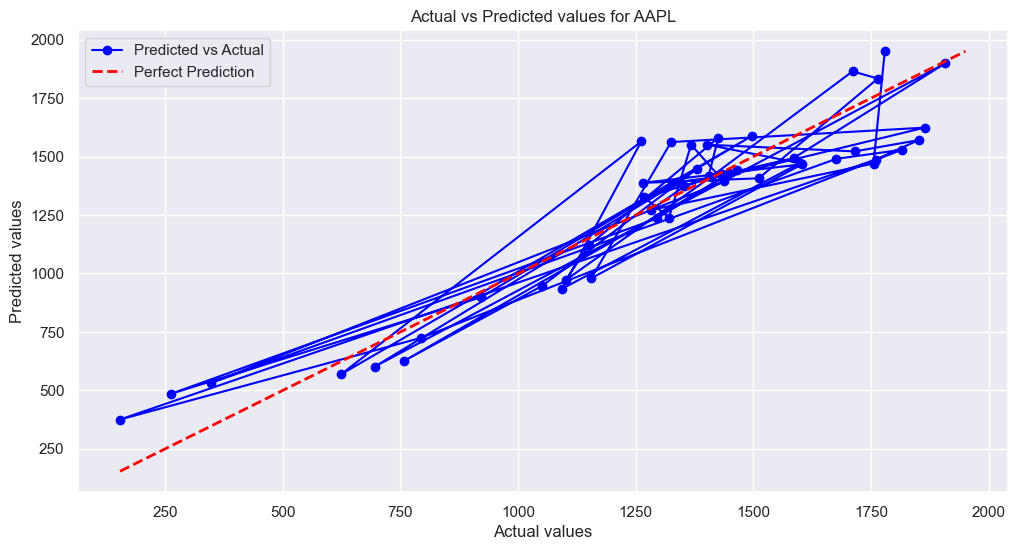

Predicted price for AAPL: $347446.34


In [131]:
# Example usage
tickers = ['AAPL', 'MSFT', 'GOOGL']
start_date = '2023-01-01'
end_date = '2024-01-01'

stock_analyzer = MyStocks(tickers, start_date, end_date)
feature_values = [150, 2800]  # Example values for MSFT and GOOGL
predicted_price = stock_analyzer.predict_price(feature_values)
print(f"Predicted price for AAPL: ${predicted_price:.2f}")
